# Supervised Learning

You can consult the solution for this live training in `notebook-solution.ipynb`.

## Predicting values of a *target variable* given a set of *features*

* For example, predicting if a customer will buy a product *(target)* based on their location and last five purchases *(features)*.

### Regression

* Predicting the values of a continuous variable e.g., house price.

### Classification

* Predicting a binary outcome e.g., customer churn.

# Data Dictionary

The data has the following fields:

|Column name | Description |
|------------|-------------|
| `loan_id`  | Unique loan id |
| `gender`   | Gender - `Male` / `Female` |
| `married`  | Marital status - `Yes` / `No` |
| `dependents` | Number of dependents |
| `education` | Education - `Graduate` / `Not Graduate` |
| `self_employed` | Self-employment status - `Yes` / `No` |
| `applicant_income` | Applicant's income |
| `coapplicant_income` | Coapplicant's income |
| `loan_amount` | Loan amount (thousands) |
| `loan_amount_term` | Term of loan (months) |
| `credit_history` | Credit history meets guidelines - `1` / `0` |
| `property_area` | Area of the property - `Urban` / `Semi Urban` / `Rural` | 
| `loan_status` | Loan approval status (target) - `1` / `0` |

In [2]:
# Import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [3]:
# Read in the dataset
df=pd.read_csv('E:\Data Camp Project\Getting Started with Machine Learning in Python\loans.csv')

# Preview the data
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


# Exploratory Data Analysis

We can't just dive straight into machine learning!
We need to understand and format our data for modeling.
What are we looking for?

## Cleanliness

* Are columns set to the correct data type?
* Do we have missing data?

## Distributions

* Many machine learning algorithms expect data that is normally distributed.
* Do we have outliers (extreme values)?

## Relationships

* If data is strongly correlated with the target variable it might be a good feature for predictions!

## Feature Engineering

* Do we need to modify any data, e.g., into different data types (ML models expect numeric data), or extract part of the data?

In [4]:
# Remove the loan_id to avoid accidentally using it as a feature
df.drop(columns=['loan_id'],inplace=True)

In [5]:
#Check for missing Values 
df.isnull().sum()

gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [6]:
# Counts and data types per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              553 non-null    object 
 1   married             553 non-null    object 
 2   dependents          553 non-null    object 
 3   education           553 non-null    object 
 4   self_employed       553 non-null    object 
 5   applicant_income    553 non-null    int64  
 6   coapplicant_income  553 non-null    float64
 7   loan_amount         553 non-null    float64
 8   loan_amount_term    553 non-null    float64
 9   credit_history      553 non-null    float64
 10  property_area       553 non-null    object 
 11  loan_status         553 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 52.0+ KB


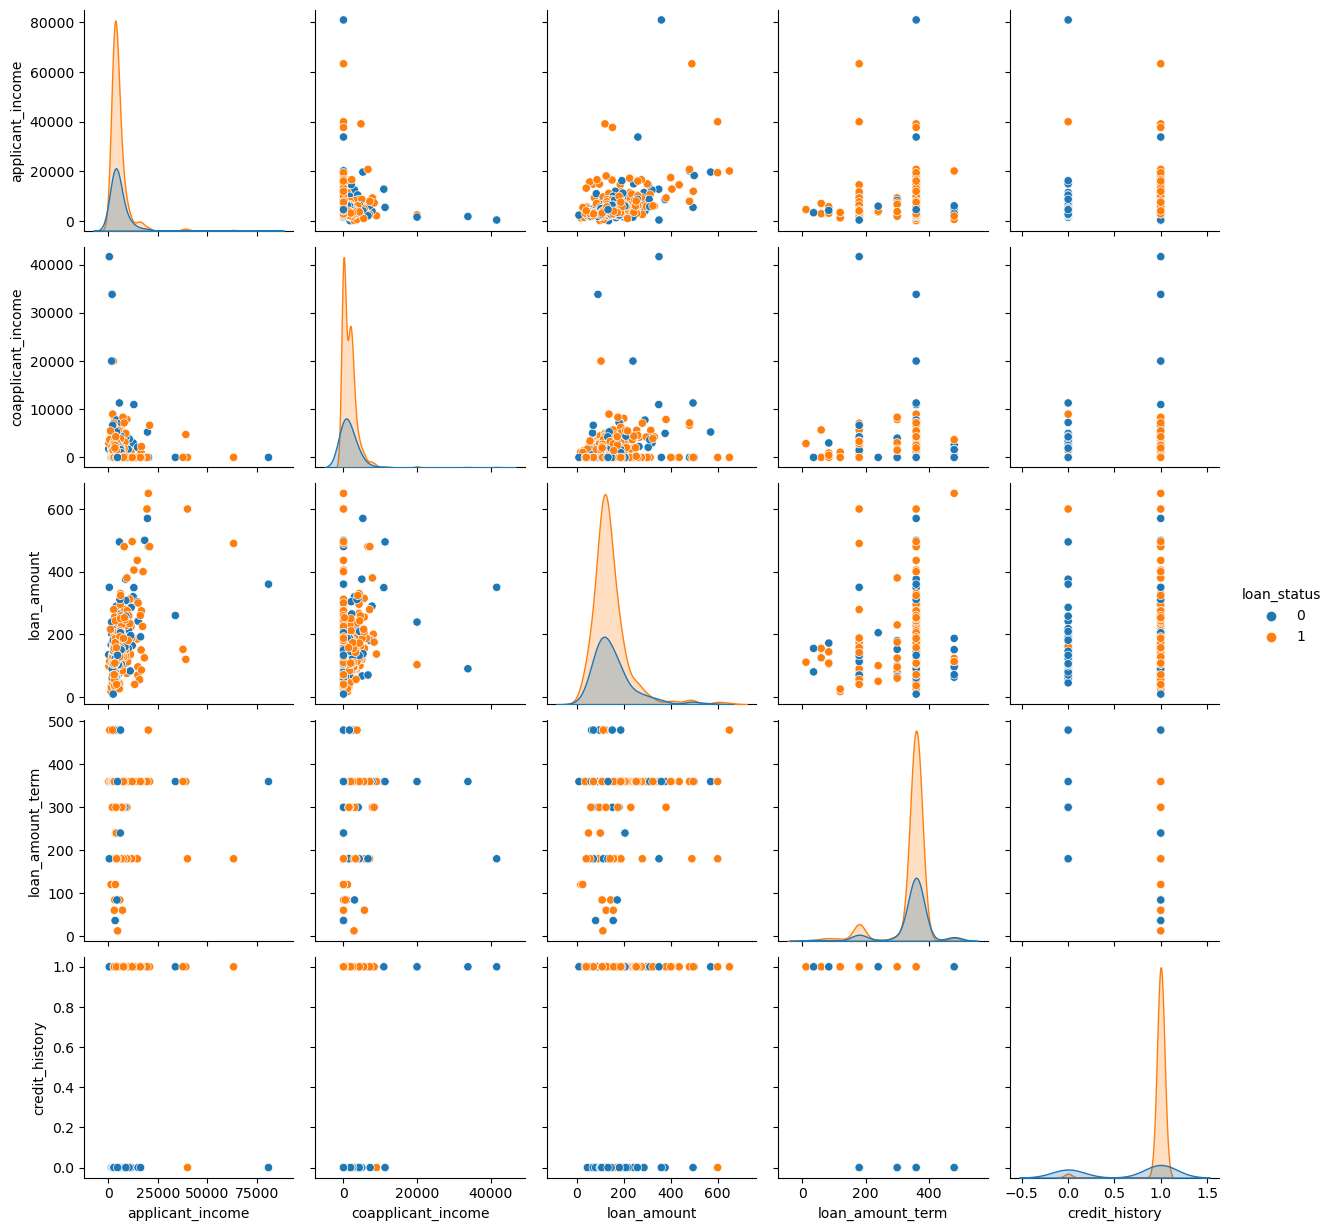

In [7]:
# Distributions and relationships
sns.pairplot(data=df,diag_kind='kde',hue='loan_status')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11528\2003639244.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


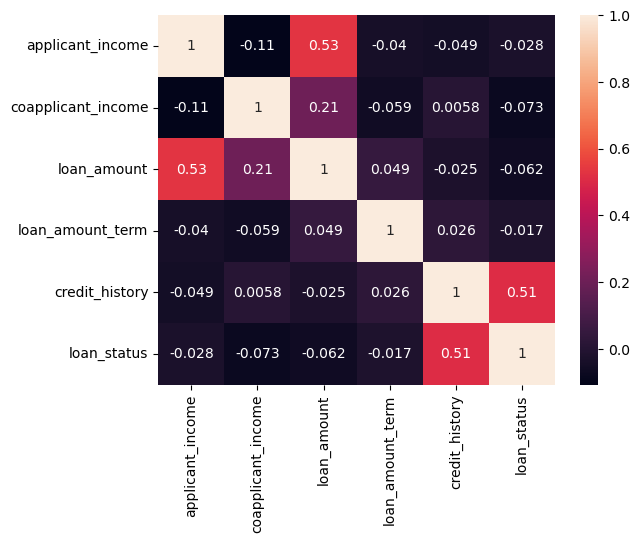

In [8]:
# Correlation between variables
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
# Target frequency
df['loan_status'].value_counts(normalize=True)

1    0.703436
0    0.296564
Name: loan_status, dtype: float64

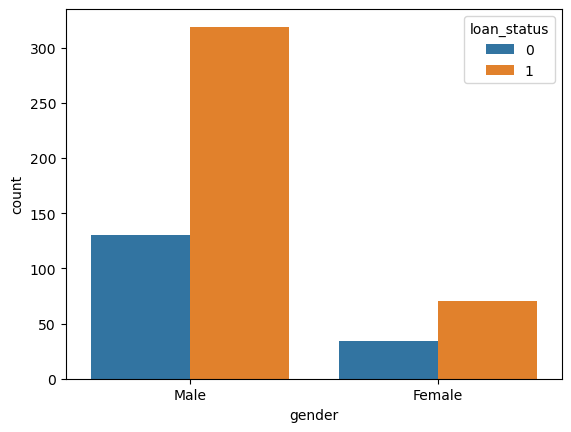

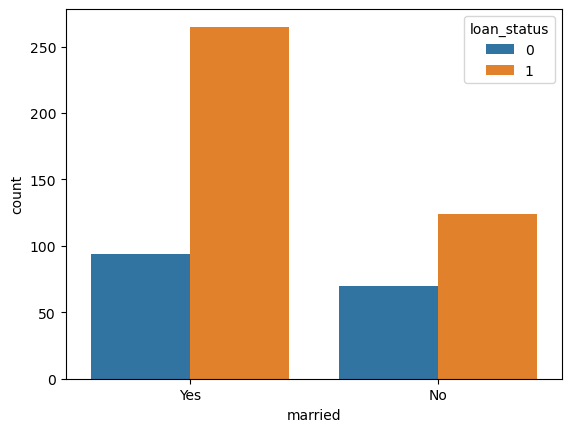

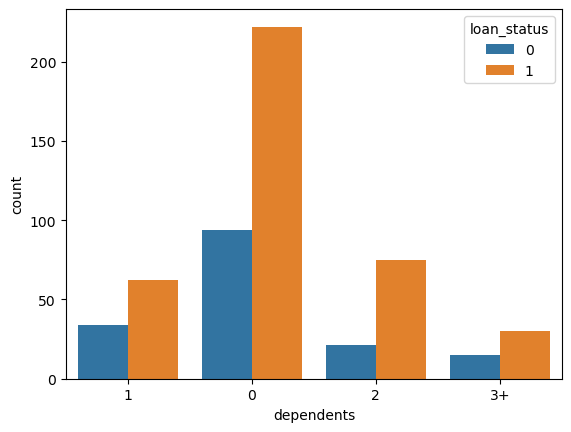

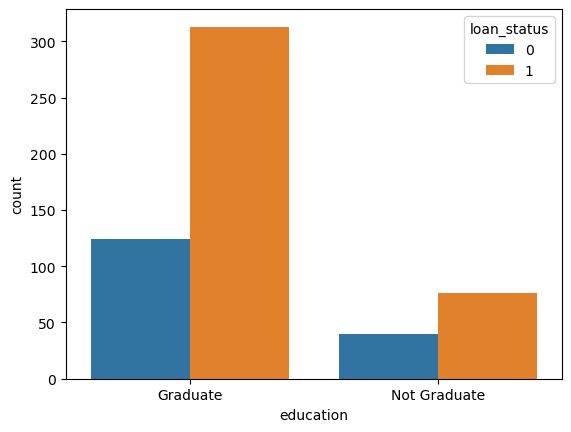

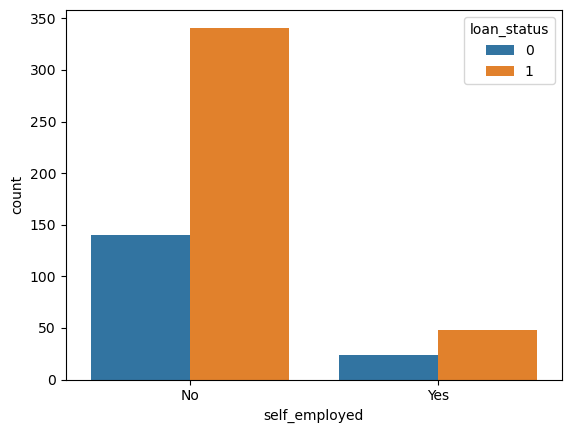

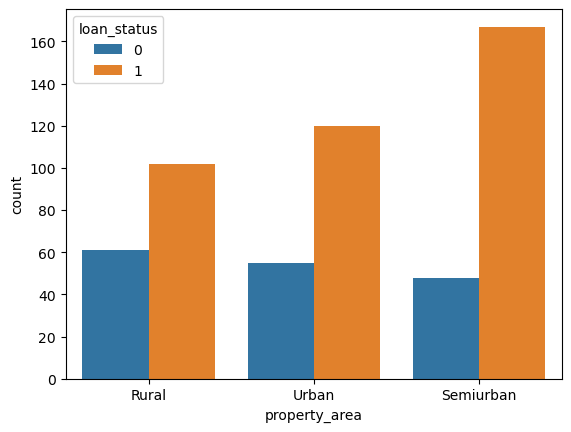

In [10]:
# Class frequency by loan_status
for col in df.columns[df.dtypes=='object']:
    sns.countplot(data=df,x=col,hue="loan_status")
    plt.show()

# Modeling

In [11]:
# First model using loan_amount
x=df[['loan_amount']]
y=df[['loan_status']]
# Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)
# Previewing the training set
print(X_train[:5],"\n",y_train[:5])

     loan_amount
7          168.0
33         184.0
26         120.0
295         67.0
265        110.0 
      loan_status
7              1
33             1
26             1
295            1
265            1


In [12]:
# Instantiate a logistic regression model
model=LogisticRegression(random_state=42)
# Fit to the training data
model.fit(X_train,y_train)
# Predict test set values
prediction=model.predict(X_test)
# Check the model's first five predictions
prediction[:5]

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1], dtype=int64)

# Classification Metrics

&nbsp;

## Accuracy

![accuracy_formula](accuracy_formula.png)

&nbsp;

## Confusion Matrix

**True Positive (TP)** = # Correctly predicted as positive

**True Negative (TN)** = # Correctly predicted as negative

**False Positive (FP)** = # Incorrectly predicted as positive (actually negative)

**False Negative (FN)** = # Incorrectly predicted as negative (actually positive)

&nbsp;

|        | **Predicted: Negative** | **Predicted: Positive** |
|--------|---------------------|---------------------|
|**Actual: Negative** | True Negative | False Positive |
|**Actual: Positive** | False Negative | True Positive |

&nbsp;

### Confusion Matrix Metrics

$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP + FN}$

In [13]:
# Accuracy
accurecy=model.score(X_test,y_test)
accurecy

0.6987951807228916

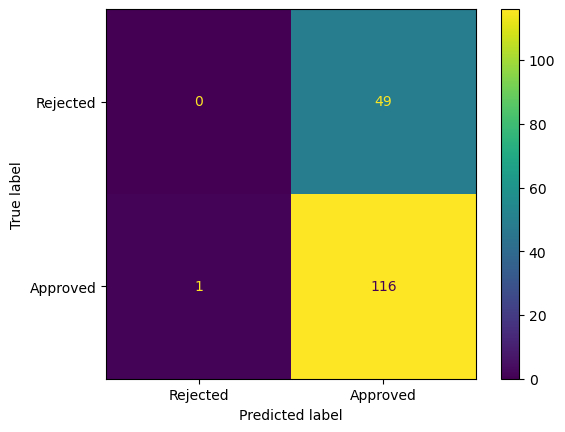

In [14]:
# Confusion matrix
cm=confusion_matrix(y_test,prediction)
display=ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=["Rejected","Approved"])
display.plot()
plt.show()

# Feature Engineering

In [15]:
# Convert categorical features to binary
df=pd.get_dummies(df)
# Previewing the new DataFrame
df.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
1,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
2,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
3,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
4,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1


In [16]:
# Resplit into features and targets
X=df.drop(columns=['loan_status'])
y=df[['loan_status']]
# Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [17]:
# Instantiate logistic regression model
model=LogisticRegression(random_state=42)
# Fit to the training data
model.fit(X_train,y_train)
# Predict test set values
y_pred=model.predict(X_test)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Accuracy
acc=model.score(X_test,y_test)
acc

0.8108108108108109

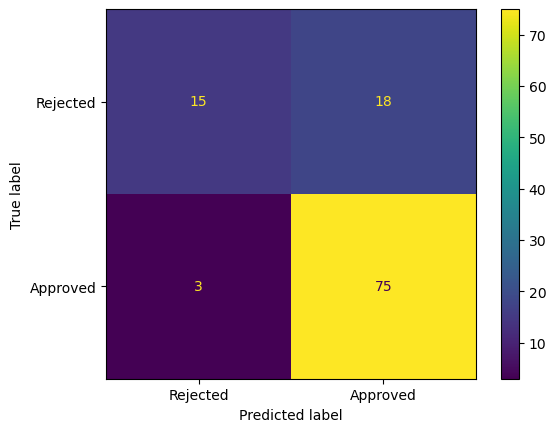

In [19]:
# Confusion matrix
cmf=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmf,display_labels=["Rejected","Approved"])
disp.plot()
plt.show()

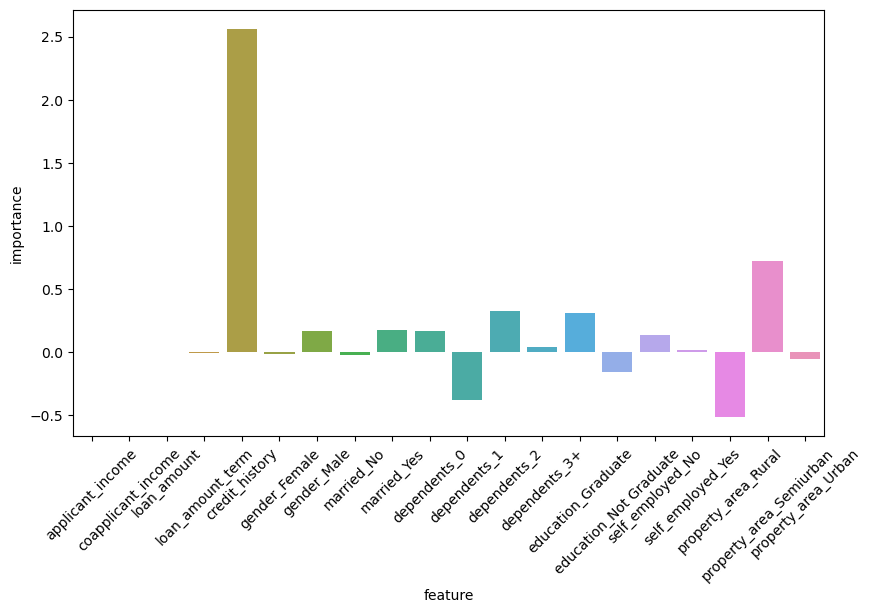

In [20]:
# Finding the importance of features (Feature Selection)
feature_importance=pd.DataFrame({
    "feature":X_train.columns,
    "importance":model.coef_.reshape(-1)
})

plt.figure(figsize=(9,5))
sns.barplot(data=feature_importance,x="feature",y="importance")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [21]:
# Illustrate feature importance
sorted_feature_importance = feature_importance.sort_values(by='importance', ascending=False)
best_feature = sorted_feature_importance.iloc[:9]['feature']
X = df[best_feature]
y=df[['loan_status']]
X


,credit_history,property_area_Semiurban,dependents_2,education_Graduate,married_Yes,gender_Male,dependents_0,self_employed_No,dependents_3+
0,1.0,0,0,1,1,1,0,1,0
1,1.0,0,0,1,1,1,1,0,0
2,1.0,0,0,0,1,1,1,1,0
3,1.0,0,0,1,0,1,1,1,0
4,1.0,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
548,1.0,0,0,1,0,0,1,1,0
549,1.0,0,0,1,1,1,0,1,1
550,1.0,0,0,1,1,1,0,1,0
551,1.0,0,1,1,1,1,0,1,0


In [22]:
# Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [23]:
# Instantiate logistic regression model
model=LogisticRegression(random_state=42)
# Fit to the training data
model.fit(X_train,y_train)

# Predict test set values
y_pred=model.predict(X_test)

# Accuracy
print(model.score(X_test,y_test))



0.8108108108108109


c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


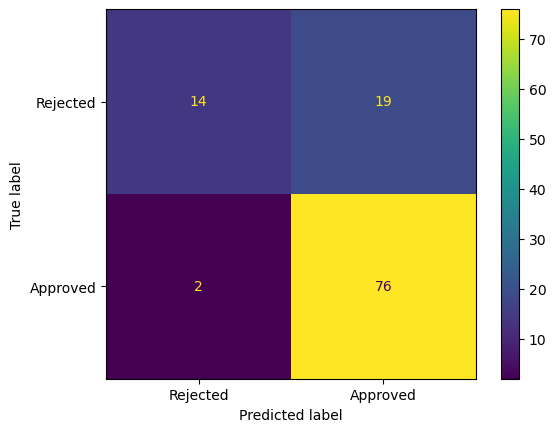

In [24]:
# Confusion matrix
cmf=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmf,display_labels=["Rejected","Approved"])
disp.plot()
plt.show()

# How might we improve model performance?

* Further [preprocessing](https://app.datacamp.com/learn/courses/preprocessing-for-machine-learning-in-python):
	- Log transformations for skewed distributions.
	- Scale feature values. 
	- Remove outliers e.g., high earners.
* Try a different model e.g., [Decision trees](https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python).
* Gather more data.
	- Train new models on incorrect predictions (may need more data and/or a holdout set).
* [Further feature engineering](https://app.datacamp.com/learn/courses/feature-engineering-for-machine-learning-in-python).
* [Hyperparameter tuning](https://app.datacamp.com/learn/courses/hyperparameter-tuning-in-python).